<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/Digit_Recognizer_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

In [0]:
train, test = tf.keras.datasets.mnist.load_data()

In [0]:
x_train, y_train = train

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
x_test, y_test = test

In [0]:
x_test.shape, y_test.shape

In [10]:
y_train[55]

8

In [11]:
x_train[55]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
import matplotlib.pyplot as plt

In [0]:
def show_img(img, title=""):
    plt.imshow(img, cmap="gray")
    plt.title(title)

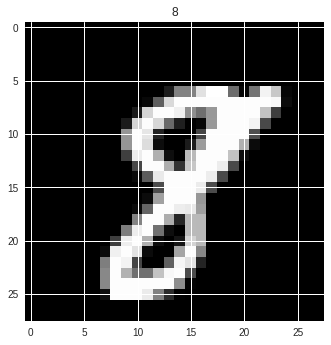

In [17]:
show_img(x_train[55], y_train[55])

In [0]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super(ResnetIdentityBlock, self).__init__(name='')
    filters1, filters2, filters3 = filters
    
    self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
    self.bn2a = tf.keras.layers.BatchNormalization()
    
    self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn2b = tf.keras.layers.BatchNormalization()
    
    self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn2c = tf.keras.layers.BatchNormalization()
    
  def call(self, input_tensor, training=False):
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2c(x)
    x = self.bn2c(x, training=training)
    
    x += input_tensor
    return tf.nn.relu(x)

In [0]:
resnet_block = ResnetIdentityBlock(1, [1, 2, 3])

In [21]:
resnet_block.layers

In [0]:
class ResnetLayer(tf.keras.layers.BatchNormalization):  
  def call(self, x): return x + super().call(x)


In [0]:
class Resnet(tf.keras.Model):
    def __init__(self, layers, c):
        super().__init__()
        
        self.conv1 = tf.keras.layers.Conv2D(3, 10, kernel_size=5, stride=1, padding=2)
        
        self.layers = tf.keras.Sequential([tf.keras.layers.BatchNormalization(layers[i], layers[i+1])
            for i in range(len(layers) - 1)])
        
        self.layers2 = tf.keras.Sequential([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        
        self.layers3 = tf.keras.Sequential([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        
        self.out = tf.keras.Sequential(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        
        for l,l2,l3 in zip(self.layers, self.layers2, self.layers3):
            x = l3(l2(l(x)))
                
        #x = F.adaptive_max_pool2d(x, 1) # jsut calculate the target and do just max pool . 1 x 1 x 10 (minibatch by num features)
        max_pool = tf.keras.layers.GlobalMaxPool2D(data_format='channels_last', x) # needcheck where chennels are
        
        x = max_pool.
        
        # here must be 10
        x = x.view(x.size(0), -1)        
        return F.log_softmax(self.out(x), dim=-1)

In [0]:
#?tf.keras.Model
#?tf.keras.Sequential
#?tf.keras.layers.Dense
?tf.keras.layers.GlobalMaxPool2D

In [19]:
model = tf.keras.Sequential(
    ResnetIdentityBlock(1, [1, 2, 3])
)

TypeError: ignored